# labelling
Purpose: Create all the labels needed
- number of appearances in past 24h
- number of appearences in past 3 days
- btc sma price movement for past 7 days
- current price compared to high/low of past 2 hours
- price gain over past 2 hours, 12 hours
- pct gain compared to top 5 peers: special one? Or all rallying?
- Is continuation? To which degree? ie 1 if previous was also that

In [21]:
import binance_helpers as bh
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import model as m
import ui
import importlib
import time
from datetime import datetime, timedelta
client = bh.new_binance_client()
importlib.reload(m)

<module 'model' from '/Users/SunnyNie/Documents/Investing/metagame/model.py'>

In [28]:
trades = pd.read_csv("data/trades.csv", index_col=0, parse_dates=True).iloc[-15000:]

In [29]:
trades

,trades,pret,target
timestamp,,,
2018-09-01 20:00:00,neo,0.020812,0.005058
2018-09-01 22:00:00,etc,-0.004364,0.003322
2018-09-02 00:00:00,bnb,0.005295,0.011510
2018-09-02 02:00:00,eth,-0.005151,-0.009127
2018-09-02 04:00:00,icx,0.038464,0.012468
...,...,...,...
2022-02-02 10:00:00,people,0.056599,0.015369
2022-02-02 12:00:00,agld,0.272371,0.097045
2022-02-02 14:00:00,idex,0.171811,-0.179169


In [30]:
t = list(map(lambda x: x>0.01, trades.target))

In [31]:
t.count(True)

7143

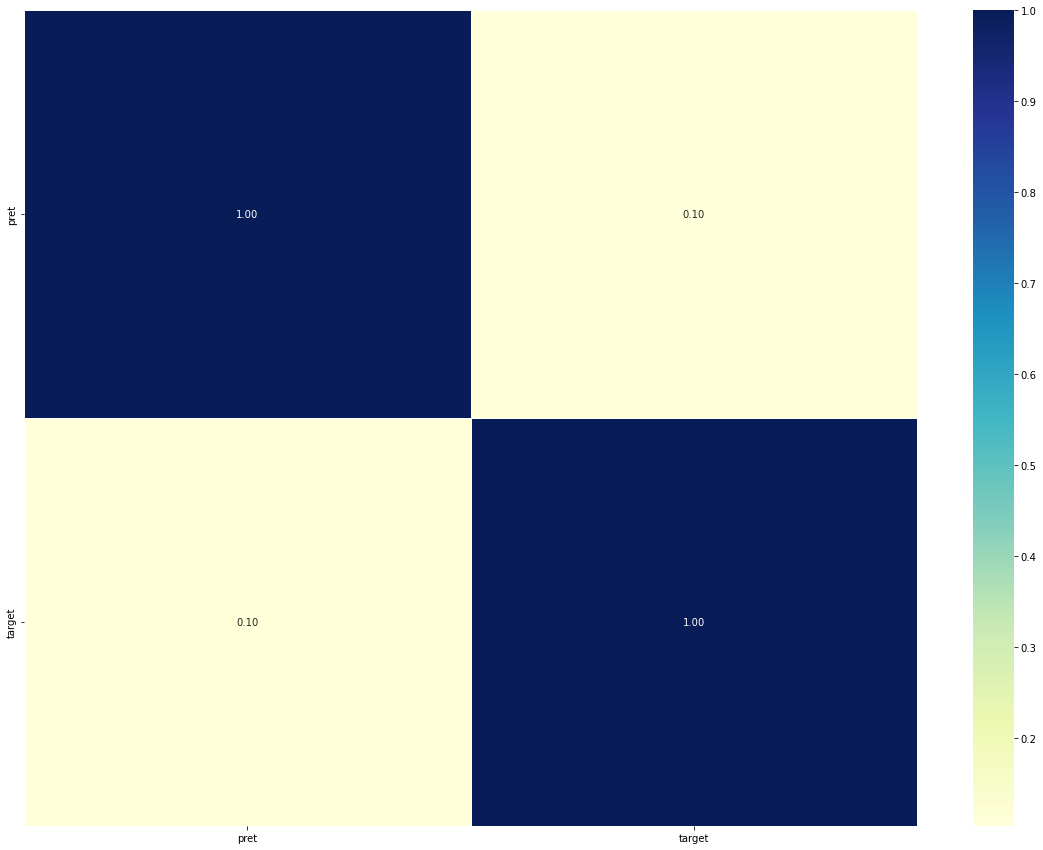

In [32]:
indicators = list(trades.columns)
# indicators.append("target")

d = trades[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [33]:
trades.iloc[:-1000].to_csv("cont.csv")
trades.iloc[-1000:].to_csv("test.csv")